# "Veri yeni petroldür."


Veri bilimciler, çeşitli kaynaklardan veri toplarlar. Sadece birkaç tanesine bakalım:

- Web'den ham verileri olduğu gibi toplarlar.
- Şirketlerinin müşterilerinden bilgi toplarlar.
- İnternet üzerinde mevcut tüm formatlardaki genel verileri kullanırlar.
- İnternete veya internete vb. bağlı makinelerden algısal veriler toplarlar.

Yukarıdaki kaynaklardan elde edilen ham veriler çeşitli biçimlerde ve formatlarda gelir. Veri bilimcilerin işi bu verileri güvenilir, temiz ve kullanışlı verilere dönüştürmek ve o verilere dayanarak olayın iç yüzünü anlamaktır. Verileri dönüştürmek ve temizlemek o kadar önemlidir ki siz de daha önce bu cümleye benzer bir şey duymuşsunuzdur: "Veri bilim insanları, zamanlarının %80'ini verilerinin temizlenmesi ve işlenmesi için harcarlar. Zamanlarının geri kalanında ise, modeller kurar ve bunları sunar." Bu sayıların kesin değerlerinden emin değiliz ama şüphesiz ki oranlar temiz verilerle çalışmanın ne kadar önemli olduğu konusunda doğru bir fikir veriyor!

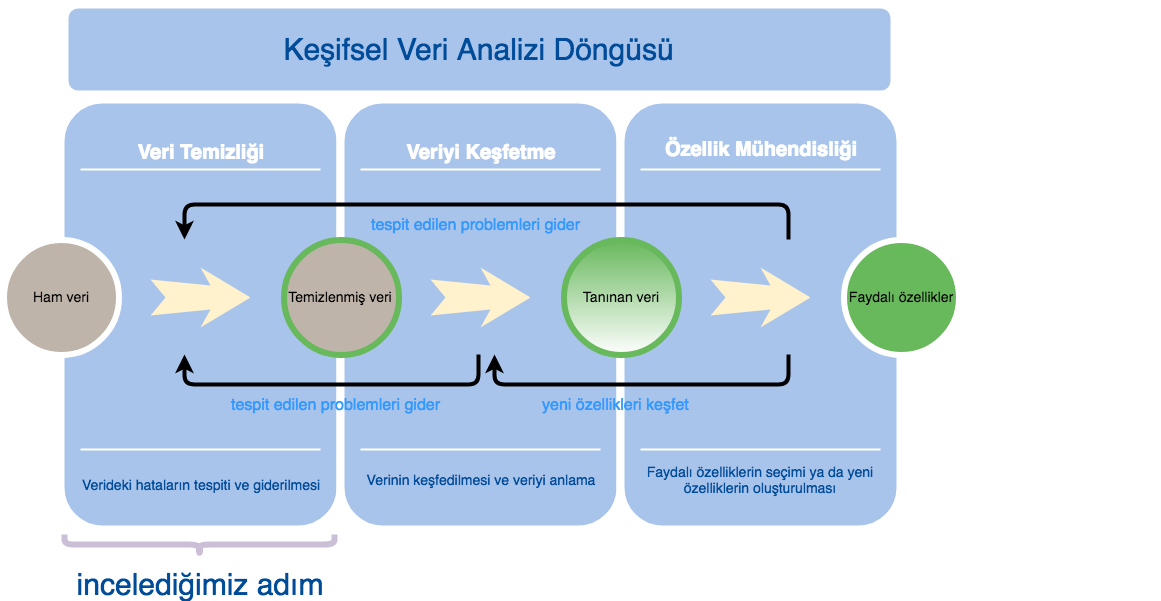

- Veri temizleme nedir
- Veri ile ilgili problemler
- Verilerle ilgili problemler nasıl tespit edilir
- Eksik verilerle nasıl baş edilir

# 1. Veri temizleme nedir?
Veri temizleme, verideki sorunların tespit edilmesi ve bir takım tekniklerle bu sorunların üstesinden gelinmesi sürecidir. Veri temizleme işlemini petrolün rafine edilmesine benzer bir şekilde düşünebiliriz. Ham petrolü otomobillerimizde kullanmayız, işlenmiş ve rafine edilmiş petrolü (benzin ya da motorin) kullanırız. Kısaca, rafine işlemi ham petroldeki zararlı elementleri çıkartır ve arabalarımızda kullanılabilecek uygun bir forma dönüştürür.

Petrol örneğine benzer şekilde, ham verilerimizi analiz ve modellerimiz için uygun olan bir şekle dönüştürmemiz gerekir. Veri temizlemenin önemini çok fazla vurgularız, çünkü sorunlu veriler ham petrolün motorlara zarar vermesi gibi modellerimizi zehirleyebilir. Bu nedenle veri bilimciler veri temizlemesini çok ciddiye alır, verilerini ve bununla ilgili potansiyel sorunları düşünmek için yeterli zaman harcar.

Veri temizleme işlemi ham verileri sadece güvenilir bir şekle dönüştürdüğü için değil, aynı zamanda temizleme işlemi sırasında verilerimizi anlamaya başladığımız için de faydalıdır. Verilerimizi ne kadar fazla bilirsek, onunla ilişkili sorunları o kadar kolay saptarız.

# 2. Verilerle ilgili sorunlar
Verilerde gözlemlenebilecek çok sayıda sorun olabilir. Aşağıda birkaç tanesini görebilirsiniz:

- Veri toplama sırasında aynı kimlik için iki giriş oluşabilir.
- Verilerdeki bazı bilgiler elimizdeki görevlerle ilgili olmayabilir.
- Verilerde bazı yapısal sorunlar olabilir. Örneğin, bazı tam sayı değerleri veritabanında metin olarak saklanabilir veya tarih alanlarının formatları beklediklerimizden farklı olabilir.
- Açıklanması zor olan aşırı değerler gibi bazı uygun olmayan değerler verilerde bulunabilir. Bu değerler, sonuçlarımızı etkileyebileceği için analizimize zarar verebilir. Bu yüzden bir sonraki derste bu sorunu detaylı olarak tartışacağız.
- Kritik gözlemler için eksik değerler verilerde mevcut olabilir. Bu, üzerinde çalışabileceğimiz veri noktalarının sayısını azaltabilir, bu da bazı değerli bilgileri kaybedebileceğimiz anlamına gelir.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

youtube = pd.read_csv("youtube.csv")
youtube.columns = ['sira', 'derece', 'kanal_adi', 'video_sayisi', 'abone_sayisi', 'goruntulenme_sayisi']

# 4. Veriyi tanımak

In [2]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
sira                   5000 non-null object
derece                 5000 non-null object
kanal_adi              5000 non-null object
video_sayisi           5000 non-null object
abone_sayisi           5000 non-null object
goruntulenme_sayisi    5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


# 5. Eksik değerler nasıl tespit edilir?

Pandas, bir veri çerçevesindeki her öğe için bir öğenin değeri yoksa (None) veya False ifadesini alırsa, True döndüren .isnull () adlı bir metoda sahiptir. Ancak, bu metodu veri çerçevemizden çağırdığımızda, şunu elde ederiz.

In [3]:
youtube.isnull().head()

,sira,derece,kanal_adi,video_sayisi,abone_sayisi,goruntulenme_sayisi
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


Bunun nedeni, veri setimizdeki eksik değerlerin boş bırakılmak yerine iki tire (--) ile gösterilmesidir. Bu, muhtemelen üzerinde çalışabileceğiniz gerçek hayattaki veri kümeleriyle ilgili genel bir durumdur. Fakat sorun şu ki bu durumları nasıl bulabiliriz? Ne yazık ki, bu soruya herkese uyan bir cevap yoktur. Söyleyebileceğimiz tek şey verilerimizi araştırmamız ve dikkatlice analiz etmemiz gerektiğidir.

Yapabileceğimiz bir şey, bir değişkendeki benzersiz değerlere bakmaktır. Bununla birlikte, bu sadece veri kümemizdeki gözlem sayısı düşükse veya değişkende az sayıda benzersiz değer varsa etkili olacaktır. Örneğin, Youtube veri kümemizde 5000 veri noktamız var ve tüm benzersiz elamanları görsel olarak incelemek için makul bir değer gibi gelebilir. Ancak, eğer 5 milyon gözlemimiz varsa ve görünüşte bir tamsayı değişkeni veri çerçevesinde nesne olarak temsil edilirse, değerlerde neyin yanlış olduğunu görsel olarak incelemek mümkün olmayabilir.

Önceki dertste, Pandas'ın veri çerçevelerinde her sütundaki benzersiz değerlerin sayısını elde etmek için bize .nunique () metodunu sunduğunu gördük. Benzersiz değerleri incelemek için veri çerçevesinin sütunlarında .unique () yöntemini çağırabiliriz. Örneğin, Youtube verilerindeki her bir sütuna ait tüm benzersiz değerleri almak için:

In [4]:
for sutun_adi in youtube.columns:
    print("{} sütunundaki benzersiz değerler : {}".format(sutun_adi, youtube[sutun_adi].unique()))

sira sütunundaki benzersiz değerler : ['1st' '2nd' '3rd' ... '4,998th' '4,999th' '5,000th']
derece sütunundaki benzersiz değerler : ['A++ ' 'A+ ' 'A ' '\xa0 ' 'A- ' 'B+ ']
kanal_adi sütunundaki benzersiz değerler : ['Zee TV' 'T-Series' 'Cocomelon - Nursery Rhymes' ... 'Mastersaint'
 'Bruce McIntosh' 'SehatAQUA']
video_sayisi sütunundaki benzersiz değerler : ['82757' '12661' '373' ... '1735' '706' '3475']
abone_sayisi sütunundaki benzersiz değerler : ['18752951' '61196302' '19238251' ... '3265735' '32990' '21172']
goruntulenme_sayisi sütunundaki benzersiz değerler : [20869786591 47548839843  9793305082 ...   311758426    14563764
    73312511]


Gördüğünüz gibi, samanlıkta iğne aramak gibi bir iş! Ancak, yaratıcılığınız bu tür şeylerde çok yardımcı olur. Örneğin, video_sayisi ve abone_sayisi değişkenleri sayısal görünmektedir, bu nedenle ondalıklı sayıya dönüştürülemeyen değerler sorunlu değerler olmalıdır. Şimdi bunu bulalım:

In [5]:
for sutun_adi in ["video_sayisi", "abone_sayisi"]:
    print("{} sütunu için problemli değerler : ".format(sutun_adi))
    for deger in youtube[sutun_adi]:
        try:
            float(deger)
        except:
            print(deger)

video_sayisi sütunu için problemli değerler : 
--
--
--
--
--
--
abone_sayisi sütunu için problemli değerler : 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 
-- 


Gördüğümüz gibi, bu iki sütundaki eksik değerler -- olarak tutulur. -- etrafında boşluk(lar) olabileceğini göz ardı etmeyin. Şimdi onları boş metine dönüştürelim ve sonra değişkenleri ondalıklı sayıya çevirelim:

In [6]:
youtube["video_sayisi"] = youtube["video_sayisi"].apply(str.strip).replace("--", np.nan)
youtube["video_sayisi"] = pd.to_numeric(youtube["video_sayisi"], downcast="float")

youtube["abone_sayisi"] = youtube["abone_sayisi"].apply(str.strip).replace("--", np.nan)
youtube["abone_sayisi"] = pd.to_numeric(youtube["abone_sayisi"], downcast="float")

Artık video_sayisi ve abone_sayisi sütunlarının float türünde olup olmadığını kontrol edebiliriz:

In [7]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
sira                   5000 non-null object
derece                 5000 non-null object
kanal_adi              5000 non-null object
video_sayisi           4994 non-null float32
abone_sayisi           4613 non-null float32
goruntulenme_sayisi    5000 non-null int64
dtypes: float32(2), int64(1), object(3)
memory usage: 195.4+ KB


In [8]:
youtube.isnull().head(20)

,sira,derece,kanal_adi,video_sayisi,abone_sayisi,goruntulenme_sayisi
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


şimdi yüzdeleri hesaplayalım

In [9]:
youtube.isnull().sum()*100/youtube.shape[0]

sira                   0.00
derece                 0.00
kanal_adi              0.00
video_sayisi           0.12
abone_sayisi           7.74
goruntulenme_sayisi    0.00
dtype: float64

Her şey iyi görünebilir ama değil! derece sütunu için de bazı problemli değerlerimiz var. Fakat derece kategorik bir değişken olduğundan, bu sefer her bir değerin tekrar sayısını sayalım:

In [10]:
youtube.derece.value_counts()

B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: derece, dtype: int64

Kayıp değerleri sayarken etraflarında bazı boşluklar olduğu için görünmeyen bazı boş dizge değerlerimiz var gibi görünüyor. Onları np.nan a dönüştürelim ve değişikliklerimizin etkili olup olmadığını kontrol edelim:

In [11]:
youtube.derece = youtube.derece .apply(str.strip).replace("", np.nan)

youtube.derece.unique()

array(['A++', 'A+', 'A', nan, 'A-', 'B+'], dtype=object)

# 6. Eksik değerleri ele almak için yaklaşımlar
Genel olarak, eksik değerlerle ilgilenmek için iki seçeneğimiz vardır.

- Eksik değerlere sahip satırları dikkate almamak: Bir veri kümesindeki satırları silmek, önemli bilgileri kaybetmediğimizi düşünmediğimiz sürece kaçınılması gereken bir şeydir. Bir veri kümesindeki her gözlem bazı bilgiler verir ve bu bilgiler birçok durumda paha biçilmez olabilir. Bununla birlikte, eksik değerleri olan satırları kaldırdıktan sonra hala çok fazla veri noktamız varsa, bu yaklaşım muhtemelen en güvenli yoldur. Bu yaklaşımı takip etmek isteyebileceğimiz diğer bir durum, eksik değerleri doldurmak için uygun bir yol bulamadığımız zaman ortaya çıkar. O zaman eksik değerlere sahip satırları kaldırabiliriz. Bunun nedeni, eksik olanların yerine gelecek doldurma değerlerinin, doldurduğumuz değerlerin dikkatlice seçilmemesi durumunda analiz sonuçlarımızı değiştirebileceği gerçeğidir.

- Eksik değerleri bazı tehlikeli olmayan değerlerle doldurma: Bu yaklaşım, muhtemelen pek çok veri bilimcisinin, eksik değerleri olan değişkenlerle karşılaştığında izledikleri en yaygın yöntemdir. Eksik değerleri bir değerle değiştirerek, veri noktalarını yerinde tutarız ve analizimizde bu veri noktalarındaki bilgilerden faydalanabiliriz.

# 6.1. Sürekli bir değişkende eksik değerlerin doldurulması
Sürekli değişkenler teoride sınırsız sayıda farklı değere sahiptir. Bu yüzden eksik olanların yerine hangi değeri koymamız gerektiğine karar vermek istatistiksel bir sorudur. Yaygın yaklaşımlar, bir değişkendeki eksik değerlerin, bu değişkenin ortalama, medyan veya mod değeri ile doldurulmasını içerir.

Tüm bu istatistiksel değerlerin bir değişkendeki merkezi eğilimin ölçüleri olduğunu hatırlayın. Dolayısıyla, eksik değerleri bunlarla doldurmak, merkezi eğilimin temsilcisi olan değerleri koymamızı sağlamaya çalışır ve bu nedenle bu değerler analizimizi etkilemez.

In [12]:
youtube.head()

,sira,derece,kanal_adi,video_sayisi,abone_sayisi,goruntulenme_sayisi
0,1st,A++,Zee TV,82757.0,18752952.0,20869786591
1,2nd,A++,T-Series,12661.0,61196304.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238252.0,9793305082
3,4th,A++,SET India,27323.0,31180560.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433


In [13]:
youtube["video_sayisi"].fillna(youtube["video_sayisi"].mean(), inplace=True)
youtube["abone_sayisi"].fillna(youtube["abone_sayisi"].mean(), inplace=True)
youtube.isnull().sum()*100/youtube.count()

sira                   0.000000
derece                 0.120144
kanal_adi              0.000000
video_sayisi           0.000000
abone_sayisi           0.000000
goruntulenme_sayisi    0.000000
dtype: float64

Eksik değerleri doldurmak için bir başka popüler yöntem enterpolasyonu kullanmaktır. Enterpolasyondaki temel fikir, iki eksik olmayan değer arasında bulunan eksik değerleri, bu eksik olmayan değerleri kullanarak doldurmaktır. Örneğin, eksik olmayan iki değer arasında bir eksik değere sahipsek, eksik olmayan iki değerin ortalamasını alabilir ve eksik olana atayabiliriz.

Bununla birlikte, enterpolasyon, gözlemlerin anlamlı bir sıralamasını ve sıralanan verilerdeki bir eğilimi gerektirir. Bu nedenle bu yöntem özellikle zaman serisi analizleri arasında popülerdir. Ancak, sıralı olmayan verilere uygulamak hatalı olabilir. Bu Wikipedia makalesi'nde enterpolasyon hakkında daha fazla bilgi bulabilirsiniz .

# 6.2. Kategorik bir değişkende eksik değerlerin doldurulması
Kategorik değişkenleri doldurmak, sürekli değişkenleri doldurmaktan biraz daha karışıktır. Bunun nedeni, sürekli değişkenlerde yaptığımız gibi merkezi eğilim gibi bir şeyi ölçen değerleri kullanamamaktır. Bunun yerine iki stratejiyi takip edebiliriz:

- other veya unknown gibi eksik değerler için yeni bir kategori oluşturabiliriz.

- Mevcut kategoriler arasında uygun bir kategori bulmaya çalışabilir ve bu kategoriyi eksik değerlerin yerine koyabiliriz. Ama nasıl? Bunun bir yolu en yaygın kategoriyi kullanmaktır. Ancak, daha karmaşık yaklaşımlar da mümkündür. Örneğin, Youtube verilerinde derece değişkeni kategoriktir ve kanalların normal olarak sıralandığını biliyoruz. Böylece yukarıdaki kanalın kategorisini eksik olanın yerine koyabiliriz. Bunu veri kümemizde yapalım:

In [14]:
derece_listesi = youtube.derece

for i in range(0, len(derece_listesi)):
    if pd.isnull(derece_listesi[i]):
        derece_listesi[i] = derece_listesi[i-1]
        
youtube["derece"].unique()

array(['A++', 'A+', 'A', 'A-', 'B+'], dtype=object)

In [15]:
youtube.to_csv('youtube_temiz.csv', encoding = 'utf8')